# REDUCCION DE IMAGENES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from astropy.visualization import ZScaleInterval
from astropy.coordinates import SkyCoord

In [2]:
#abrimos las imagenes de NGC6618 en el filtro B
b1=fits.open('V462_B_30.000secs_00000520.fit')
b2=fits.open('V462_B_30.000secs_00000521.fit')
b3=fits.open('V462_B_30.000secs_00000522.fit')
b4=fits.open('V462_B_30.000secs_00000523.fit')
b5=fits.open('V462_B_30.000secs_00000524.fit')
b6=fits.open('V462_B_30.000secs_00000525.fit')
b7=fits.open('V462_B_30.000secs_00000526.fit')
b8=fits.open('V462_B_30.000secs_00000527.fit')
b9=fits.open('V462_B_30.000secs_00000528.fit')
b10=fits.open('V462_B_30.000secs_00000530.fit')


In [3]:
#abrimos las imagenes de NGC6618 en el filtro V
v1=fits.open('V462_V_30.000secs_00000510.fit')
v2=fits.open('V462_V_30.000secs_00000511.fit')
v3=fits.open('V462_V_30.000secs_00000512.fit')
v4=fits.open('V462_V_30.000secs_00000513.fit')
v5=fits.open('V462_V_30.000secs_00000514.fit')
v6=fits.open('V462_V_30.000secs_00000515.fit')
v7=fits.open('V462_V_30.000secs_00000516.fit')
v8=fits.open('V462_V_30.000secs_00000517.fit')
v9=fits.open('V462_V_30.000secs_00000518.fit')
v10=fits.open('V462_V_30.000secs_00000519.fit')


In [4]:
#extraemos las imagenes filtro b
datab1=b1[0].data
datab2=b2[0].data
datab3=b3[0].data
datab4=b4[0].data
datab5=b5[0].data
datab6=b6[0].data
datab7=b7[0].data
datab8=b8[0].data
datab9=b9[0].data
datab10=b10[0].data

#extraemos las imagenes filtro v
datav1=v1[0].data
datav2=v2[0].data
datav3=v3[0].data
datav4=v4[0].data
datav5=v5[0].data
datav6=v6[0].data
datav7=v7[0].data
datav8=v8[0].data
datav9=v9[0].data
datav10=v10[0].data

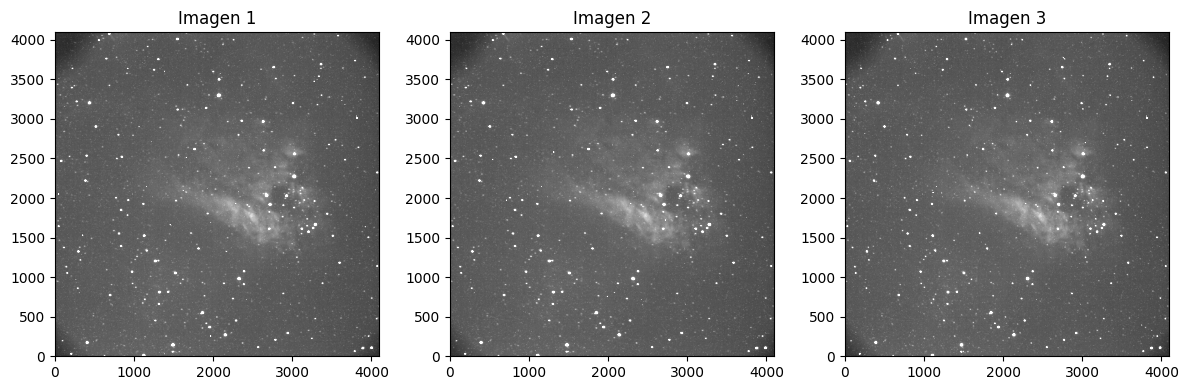

In [5]:
#graficamos algunas imagenes pa sapear
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(datab2)
min_value,max_value=zscale.get_limits(datab3)
min_value,max_value=zscale.get_limits(datab4)

fig,ax=plt.subplots(1,3, figsize=(12,4))
ax[0].imshow(datab2,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
ax[0].set_title('Imagen 1')
ax[1].imshow(datab3,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
ax[1].set_title('Imagen 2')
ax[2].imshow(datab4,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
ax[2].set_title('Imagen 3')

plt.tight_layout()
plt.show()

# BIAS

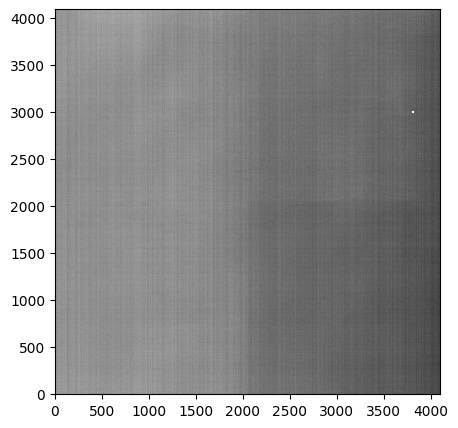

In [6]:
#extraemos los bias
bias1 = fits.open('Bias_1x1_00000494.fit')[0].data
bias2 = fits.open('Bias_1x1_00000495.fit')[0].data
bias3 = fits.open('Bias_1x1_00000496.fit')[0].data
bias4 = fits.open('Bias_1x1_00000497.fit')[0].data
bias5 = fits.open('Bias_1x1_00000498.fit')[0].data
bias6 = fits.open('Bias_1x1_00000499.fit')[0].data
bias7 = fits.open('Bias_1x1_00000500.fit')[0].data
bias8 = fits.open('Bias_1x1_00000501.fit')[0].data
bias9 = fits.open('Bias_1x1_00000502.fit')[0].data
bias10 = fits.open('Bias_1x1_00000503.fit')[0].data

#combianamos los bias para el master bias
master_bias=np.mean([bias1, bias2, bias3, bias4, bias5, bias6, bias7, bias8, bias9, bias10],axis = 0)
master_bias.shape

#grafica master bias
fig=plt.figure(figsize=(5,5))
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(master_bias)

plt.imshow(master_bias,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')

# DARK Y DARK CURRENT

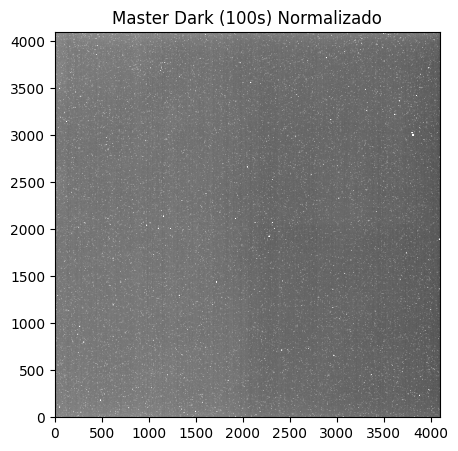

In [7]:
# importamos los darks
dark1=fits.open('Dark_100.000secs_00000484.fit')[0].data
dark2=fits.open('Dark_100.000secs_00000485.fit')[0].data
dark3=fits.open('Dark_100.000secs_00000486.fit')[0].data
dark4=fits.open('Dark_100.000secs_00000487.fit')[0].data
dark5=fits.open('Dark_100.000secs_00000488.fit')[0].data
dark6=fits.open('Dark_100.000secs_00000489.fit')[0].data
dark7=fits.open('Dark_100.000secs_00000490.fit')[0].data
dark8=fits.open('Dark_100.000secs_00000491.fit')[0].data
dark9=fits.open('Dark_100.000secs_00000492.fit')[0].data
dark10=fits.open('Dark_100.000secs_00000493.fit')[0].data

#creamos master dark y dark current
master_dark = np.median([dark1, dark2,dark3, dark4, dark5, dark6, dark7, dark8, dark9, dark10],axis=0)
dark_current=np.mean([dark1-master_bias, dark2-master_bias, dark3-master_bias, dark4-master_bias, dark5-master_bias, dark6-master_bias, dark7-master_bias, dark8-master_bias, dark9-master_bias, dark10-master_bias], axis=0)/100

#aqui nuestro tiemmpo de exp de los darks son de 100 s, pero nuestras imagenes ciencia son de 30 s, asi que lo reescalamos
master_dark30s = master_bias + (dark_current * 30)

#grafica master dark
fig=plt.figure(figsize=(5,5))
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(master_dark)

plt.imshow(master_dark30s,vmin=min_value, vmax=max_value,cmap='gray',origin='lower')
plt.title('Master Dark (100s) Normalizado')
plt.show()


# FLATS

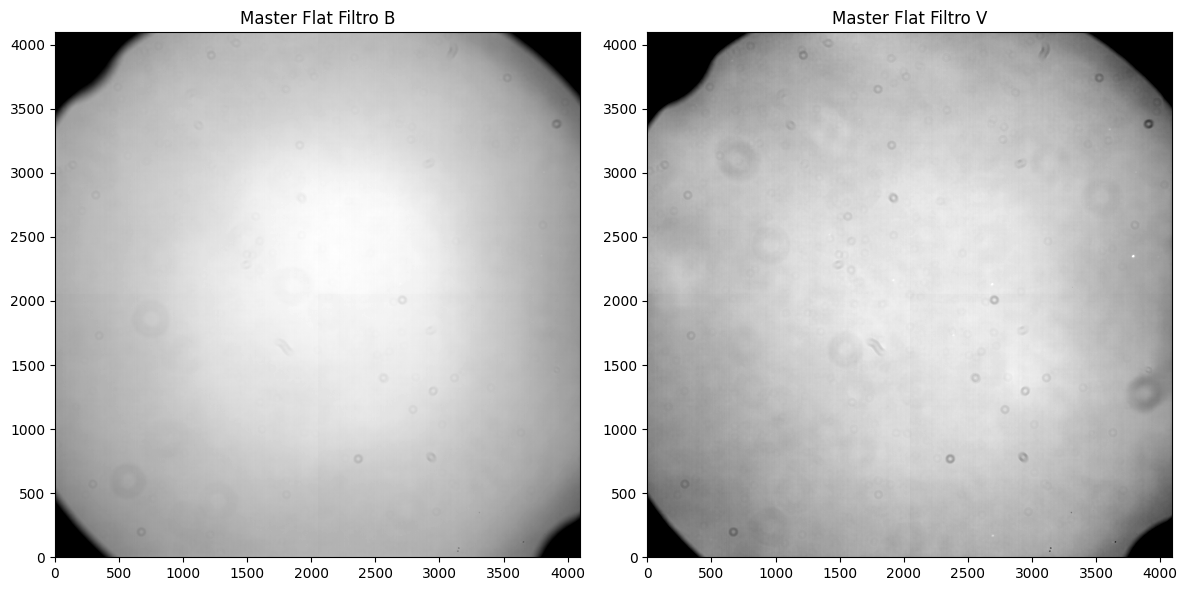

In [8]:

# extraemos los flats del filtro b
flatb1 = fits.open('FLAT_B_B11-001.fit')[0].data
flatb2 = fits.open('FLAT_B_B11-002.fit')[0].data
flatb3 = fits.open('FLAT_B_B11-003.fit')[0].data
flatb4 = fits.open('FLAT_B_B11-004.fit')[0].data
flatb5 = fits.open('FLAT_B_B11-005.fit')[0].data
flatb6 = fits.open('FLAT_B_B11-006.fit')[0].data
flatb7 = fits.open('FLAT_B_B11-007.fit')[0].data
flatb8 = fits.open('FLAT_B_B11-008.fit')[0].data
flatb9 = fits.open('FLAT_B_B11-009.fit')[0].data
flatb10 = fits.open('FLAT_B_B11-010.fit')[0].data

#RESCALAMOS A 10 SEGUNDOS y limpiamos los flats (hacemos esto pq nuestro master dark es de 100 segundos)
corrected_flats_b = [
    flatb1 - master_bias - dark_current * 4.04,
    flatb2 - master_bias - dark_current * 4.04,
    flatb3 - master_bias - dark_current * 4.04,
    flatb4 - master_bias - dark_current * 4.04,
    flatb5 - master_bias - dark_current * 4.04,
    flatb6 - master_bias - dark_current * 4.04,
    flatb7 - master_bias - dark_current * 4.04,
    flatb8 - master_bias - dark_current * 4.04,
    flatb9 - master_bias - dark_current * 4.04,
    flatb10 - master_bias - dark_current * 4.04
] 

#Master flat filtro b normalizado (rescalado)
master_flatb = np.mean(corrected_flats_b, axis=0)
master_flatb_norm = master_flatb / np.mean(master_flatb)
# extraemos flats filto v
flatv1 = fits.open('FLAT_V_B11-001.fit')[0].data
flatv2 = fits.open('FLAT_V_B11-002.fit')[0].data
flatv3 = fits.open('FLAT_V_B11-003.fit')[0].data
flatv4 = fits.open('FLAT_V_B11-004.fit')[0].data
flatv5 = fits.open('FLAT_V_B11-005.fit')[0].data
flatv6 = fits.open('FLAT_V_B11-006.fit')[0].data
flatv7 = fits.open('FLAT_V_B11-007.fit')[0].data
flatv8 = fits.open('FLAT_V_B11-008.fit')[0].data
flatv9 = fits.open('FLAT_V_B11-009.fit')[0].data
flatv10 = fits.open('FLAT_V_B11-010.fit')[0].data

#flats corregidos y reescalados
corrected_flats_v = [
    flatv1 - master_bias - dark_current * 5.59,
    flatv2 - master_bias - dark_current * 5.59,
    flatv3 - master_bias - dark_current * 5.59,
    flatv4 - master_bias - dark_current * 5.59,
    flatv5 - master_bias - dark_current * 5.59,
    flatv6 - master_bias - dark_current * 5.59,
    flatv7 - master_bias - dark_current * 5.59,
    flatv8 - master_bias - dark_current * 11.45,
    flatv9 - master_bias - dark_current * 11.45,
    flatv10 - master_bias - dark_current * 11.45
]

#normalizamos master flat filto v
master_flatv = np.mean(corrected_flats_v, axis=0)
master_flatv_norm = master_flatv / np.mean(master_flatv)

#graficamos las 2 weas 
zscale = ZScaleInterval(contrast=0.25)

# Límites para cada wea
min_b, max_b = zscale.get_limits(master_flatb_norm)
min_v, max_v = zscale.get_limits(master_flatv_norm)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(master_flatb_norm, vmin=min_b, vmax=max_b, cmap='gray', origin='lower')
ax[0].set_title('Master Flat Filtro B')

ax[1].imshow(master_flatv_norm, vmin=min_v, vmax=max_v, cmap='gray', origin='lower')
ax[1].set_title('Master Flat Filtro V')

plt.tight_layout()
plt.show()

# Reduccion

In [9]:
#FINALMENTE LA MALPARIDA REDUCCIÓN GODDD
#imagen reducifda filtro b

ima_red_b = [
   (datab1-master_dark30s)/master_flatb_norm, 
   (datab2-master_dark30s)/master_flatb_norm,
   (datab3-master_dark30s)/master_flatb_norm,
   (datab4-master_dark30s)/master_flatb_norm,
   (datab5-master_dark30s)/master_flatb_norm,
   (datab6-master_dark30s)/master_flatb_norm,
   (datab7-master_dark30s)/master_flatb_norm,
   (datab8-master_dark30s)/master_flatb_norm,
   (datab9-master_dark30s)/master_flatb_norm,
   (datab10-master_dark30s)/master_flatb_norm
]

#imagen reducifda filtro V
ima_red_v = [
   (datav1-master_dark30s)/master_flatv_norm, 
   (datav2-master_dark30s)/master_flatv_norm,
   (datav3-master_dark30s)/master_flatv_norm,
   (datav4-master_dark30s)/master_flatv_norm,
   (datav5-master_dark30s)/master_flatv_norm,
   (datav6-master_dark30s)/master_flatv_norm,
   (datav7-master_dark30s)/master_flatv_norm,
   (datav8-master_dark30s)/master_flatv_norm,
   (datav9-master_dark30s)/master_flatv_norm,
   (datav10-master_dark30s)/master_flatv_norm
]

bpm=fits.open('BPM.fit')[0].data
#combinaciion filtro v
imagen_finalv = np.mean(ima_red_v, axis=0) * bpm


#combinacion imagnes reducidas filtro b
imagen_finalb = np.mean(ima_red_b, axis=0) * bpm


C:\Users\laneg\AppData\Local\Temp\ipykernel_10040\3130047996.py:5: RuntimeWarning: invalid value encountered in divide
  (datab1-master_dark30s)/master_flatb_norm,
C:\Users\laneg\AppData\Local\Temp\ipykernel_10040\3130047996.py:6: RuntimeWarning: invalid value encountered in divide
  (datab2-master_dark30s)/master_flatb_norm,
C:\Users\laneg\AppData\Local\Temp\ipykernel_10040\3130047996.py:7: RuntimeWarning: invalid value encountered in divide
  (datab3-master_dark30s)/master_flatb_norm,
C:\Users\laneg\AppData\Local\Temp\ipykernel_10040\3130047996.py:8: RuntimeWarning: invalid value encountered in divide
  (datab4-master_dark30s)/master_flatb_norm,
C:\Users\laneg\AppData\Local\Temp\ipykernel_10040\3130047996.py:9: RuntimeWarning: invalid value encountered in divide
  (datab5-master_dark30s)/master_flatb_norm,
C:\Users\laneg\AppData\Local\Temp\ipykernel_10040\3130047996.py:10: RuntimeWarning: invalid value encountered in divide
  (datab6-master_dark30s)/master_flatb_norm,
C:\Users\laneg\

# IMAGENES FINALES

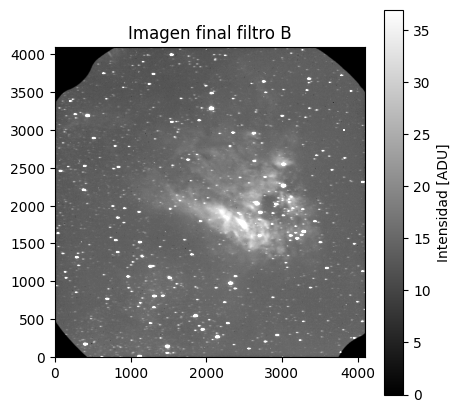

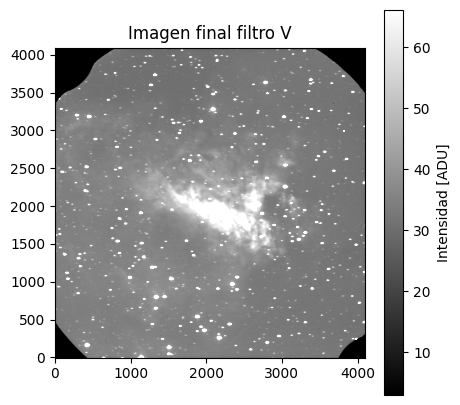

In [10]:

#graficamos ambas imagenes

fig = plt.figure(figsize=(5,5))
zscale_b = ZScaleInterval(contrast=0.25)
min_value,max_value = zscale_b.get_limits(imagen_finalb)

plt.imshow(imagen_finalb,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Imagen final filtro B')
plt.colorbar(label='Intensidad [ADU]')
plt.show()

fig = plt.figure(figsize=(5,5))
zscale_v = ZScaleInterval(contrast=0.25)
min_value,max_value = zscale_v.get_limits(imagen_finalv)

plt.imshow(imagen_finalv,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Imagen final filtro V')
plt.colorbar(label='Intensidad [ADU]')
plt.show()

# FITS Y ASTROMETRIA

In [11]:
#Creación fits y astrometría

phdu = fits.PrimaryHDU(header = b1[0].header , data = imagen_finalb)
phdu.data = np.float32(phdu.data)

phdu.header['PIXSCALE'] = 0.36
phdu.header['CTYPE1'] = 'RA---TAN'
phdu.header['CTYPE2'] = 'DEC--TAN'
phdu.header['CRPIX1'] = int(phdu.header['NAXIS1']/2)
phdu.header['CRPIX2'] = int(phdu.header['NAXIS2']/2)

coord = SkyCoord(f"{phdu.header['OBJCTRA']} {phdu.header['OBJCTDEC']}", unit=(u.hourangle, u.deg))#Transformacion de unidades a grados decimales

phdu.header['CRVAL1'] = coord.ra.value
phdu.header['CRVAL2'] = coord.dec.value
phdu.header['CD1_1'] = -0.0001
phdu.header['CD1_2'] = 0
phdu.header['CD2_1'] = 0
phdu.header['CD2_2'] = 0.0001
phdu.header['OBSERVER'] = 'Martinez, Oyarzo, Vargas'

phdu.writeto('Img_B.fits', overwrite = True)

In [12]:
phdu = fits.PrimaryHDU(header = v1[0].header , data = imagen_finalv)
phdu.data = np.float32(phdu.data)

phdu.header['PIXSCALE'] = 0.36
phdu.header['CTYPE1'] = 'RA---TAN'
phdu.header['CTYPE2'] = 'DEC--TAN'
phdu.header['CRPIX1'] = int(phdu.header['NAXIS1']/2)
phdu.header['CRPIX2'] = int(phdu.header['NAXIS2']/2)

coord=SkyCoord(f"{phdu.header['OBJCTRA']} {phdu.header['OBJCTDEC']}", unit=(u.hourangle, u.deg)) #Transformacion de unidades a grados decimales

phdu.header['CRVAL1'] = coord.ra.value
phdu.header['CRVAL2'] = coord.dec.value
phdu.header['CD1_1'] = -0.0001
phdu.header['CD1_2'] = 0
phdu.header['CD2_1'] = 0
phdu.header['CD2_2'] = 0.0001
phdu.header['OBSERVER'] = 'Martinez, Oyarzo, Vargas'

phdu.writeto('Img_V.fits', overwrite = True)

# DETECCION DE OBJETOS

In [13]:
#deteccion de objetos
from photutils.segmentation import (SourceCatalog, deblend_sources, detect_sources, detect_threshold)
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np

## 1.PARA EL FILTRO V

In [14]:
#abrio mi fit filtro v (imagen reduccioda)
imagenV = fits.open('Img_V.fits')[0]

#extraemos data y header
dataV = imagenV.data
headerV = imagenV.header
headerV

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096                                                  
NAXIS2  =                 4096                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBSERVER= 'Martinez, Oyarzo, Vargas' / SBIGFITSEXT The name of the observer     
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '           / SBIGFITSEXT The model Telescope                
FOCALLEN=                6500. / SBIGFITSEXT Telescope focal length in mm       
APTDIA  =                 500. / SBIGFITSEXT Aperture diameter in mm            
SBUUID  = '{7524519a-ed8c-4d

In [15]:
#Obtenemos el "umbral" que utilizaremos para detectar las fuentes EN EL FILTRO V
thresholdV = detect_threshold(dataV, nsigma=1)
#Utilizamos el umbral y la imagen para detectar fuentes
sourV = detect_sources(dataV, thresholdV, npixels=10)
#Mostramos el número de fuentes detectadas
sourV

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 11816
labels: [    1     2     3     4     5 ... 11812 11813 11814 11815 11816]

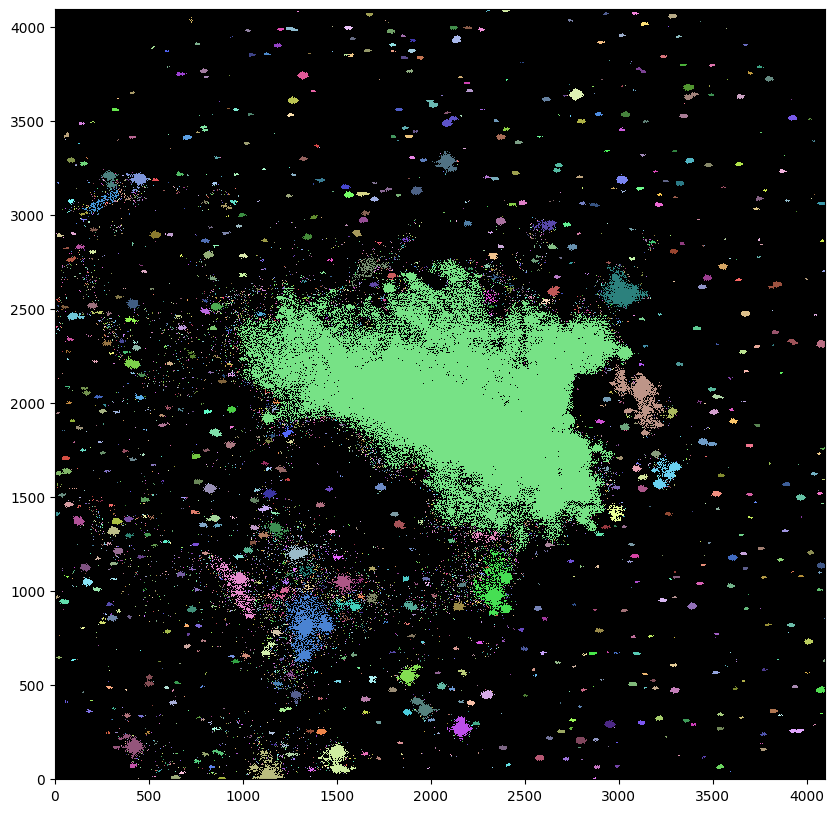

In [16]:
#Generamos un mapa de color para cada fuente del filtro V
cmap_sourV = sourV.make_cmap(seed=123)
#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(sourV, origin='lower', cmap=cmap_sourV, interpolation='nearest')
plt.show()

In [17]:
# separamos las fuentes 
sour_deblend = deblend_sources(dataV, sourV, npixels=10, nlevels=32, contrast=1)
#esto muestra el numero de fuentes detectadas
sour_deblend

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 11816
labels: [    1     2     3     4     5 ... 11812 11813 11814 11815 11816]

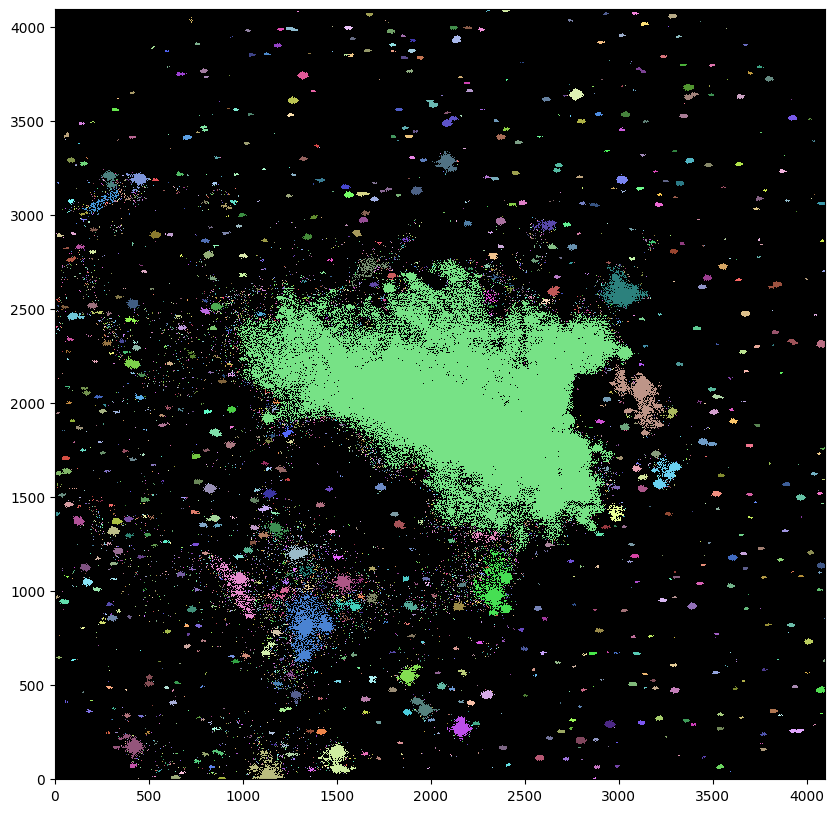

In [18]:
cmap_deblend = sour_deblend.make_cmap(seed=123)
#muesta las fuentes detectadas
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(sour_deblend, origin='lower', cmap= cmap_deblend, interpolation='nearest')
plt.show()

In [19]:
#OBTENEMOS EL CATALOGO DE FITS REDUCIDO PARA EL FILTRO V
cat = SourceCatalog(dataV, sour_deblend)
#pasamos el catalogo a una tabla (solo con los datos que nos interesan)
tb1 = cat.to_table()
tablav = tb1['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
#label: numero id de la fuente'
#xcentroid, ycentroid: coordenadas'
#area: tamaño en pixeles'
#segment_flux: flojo total (no es el real pq no cuenta el tiempo de exp)'

tablav


label,xcentroid,ycentroid,area,segment_flux
,,,pix2,
int32,float64,float64,float64,float64
1,446.1964448413885,2.038330979816175,21.0,873.8756408691406
2,640.3660450757791,7.540612483031317,867.0,75837.02642440796
3,888.534234439814,4.140159779522599,460.0,31536.92804336548
4,1133.4554647591967,14.712464522467947,11428.0,3778234.254562378
5,2869.8282614606205,2.8435330183838246,109.0,4799.4655113220215
6,770.407749952893,5.204816344508839,10.0,402.99425506591797
7,1330.9047290475166,5.186673413030547,10.0,408.38694763183594
8,678.9346938432138,8.153916399914866,19.0,760.8893280029297


In [20]:
#calculamos el flujo real 
tablav['segment_flux'] = tablav['segment_flux']/headerV['EXPTIME']
tablav

label,xcentroid,ycentroid,area,segment_flux
,,,pix2,
int32,float64,float64,float64,float64
1,446.1964448413885,2.038330979816175,21.0,29.129188028971353
2,640.3660450757791,7.540612483031317,867.0,2527.9008808135986
3,888.534234439814,4.140159779522599,460.0,1051.2309347788494
4,1133.4554647591967,14.712464522467947,11428.0,125941.14181874593
5,2869.8282614606205,2.8435330183838246,109.0,159.98218371073406
6,770.407749952893,5.204816344508839,10.0,13.433141835530598
7,1330.9047290475166,5.186673413030547,10.0,13.612898254394532
8,678.9346938432138,8.153916399914866,19.0,25.362977600097658


In [21]:
#CALCULAMOS MAG APARENTES CON EL ZEROPONIT (NO LO TENGO LOL)
#puse un valor falso x mientras
zeropoint = 39.34044722557779
tablav['magnitude'] = zeropoint - 2.5*np.log(tablav['segment_flux'])
tablav

label,xcentroid,ycentroid,area,segment_flux,magnitude
,,,pix2,,
int32,float64,float64,float64,float64,float64
1,446.1964448413885,2.038330979816175,21.0,29.129188028971353,30.911095484241546
2,640.3660450757791,7.540612483031317,867.0,2527.9008808135986,19.75258586067992
3,888.534234439814,4.140159779522599,460.0,1051.2309347788494,21.94615453717924
4,1133.4554647591967,14.712464522467947,11428.0,125941.14181874593,9.981522354646557
5,2869.8282614606205,2.8435330183838246,109.0,159.98218371073406,26.652791082513186
6,770.407749952893,5.204816344508839,10.0,13.433141835530598,32.84613491366939
7,1330.9047290475166,5.186673413030547,10.0,13.612898254394532,32.81290286469706
8,678.9346938432138,8.153916399914866,19.0,25.362977600097658,31.25722088575356


In [22]:
#Mostramos las magnitudes
np.sort(tablav['magnitude'])

2.2729104395071715
9.783182762879918
9.981522354646557
10.37796873530916
10.612338760219131
11.023024753731004
11.056794624366827
11.084035774379089
12.188399923143063
12.190975388087434
12.209281844452498


## 2.PARA EL FILTRO B

In [23]:
#ahora para filtro b, abro mi fit filtro b (imagen reduccioda)
imagenB = fits.open('Img_B.fits')[0]

#extraemos data y header
dataB = imagenB.data
headerB = imagenB.header
headerB

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096                                                  
NAXIS2  =                 4096                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBSERVER= 'Martinez, Oyarzo, Vargas' / SBIGFITSEXT The name of the observer     
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '           / SBIGFITSEXT The model Telescope                
FOCALLEN=                6500. / SBIGFITSEXT Telescope focal length in mm       
APTDIA  =                 500. / SBIGFITSEXT Aperture diameter in mm            
SBUUID  = '{36922ce2-fadc-41

In [24]:
#Obtenemos el "umbral" que utilizaremos para detectar las fuentes EN EL FILTRO b
thresholdB = detect_threshold(dataB, nsigma=1)
#Utilizamos el umbral y la imagen para detectar fuentes
sourB = detect_sources(dataB, thresholdB, npixels=10)
#Mostramos el número de fuentes detectadas
sourB

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 9528
labels: [   1    2    3    4    5 ... 9524 9525 9526 9527 9528]

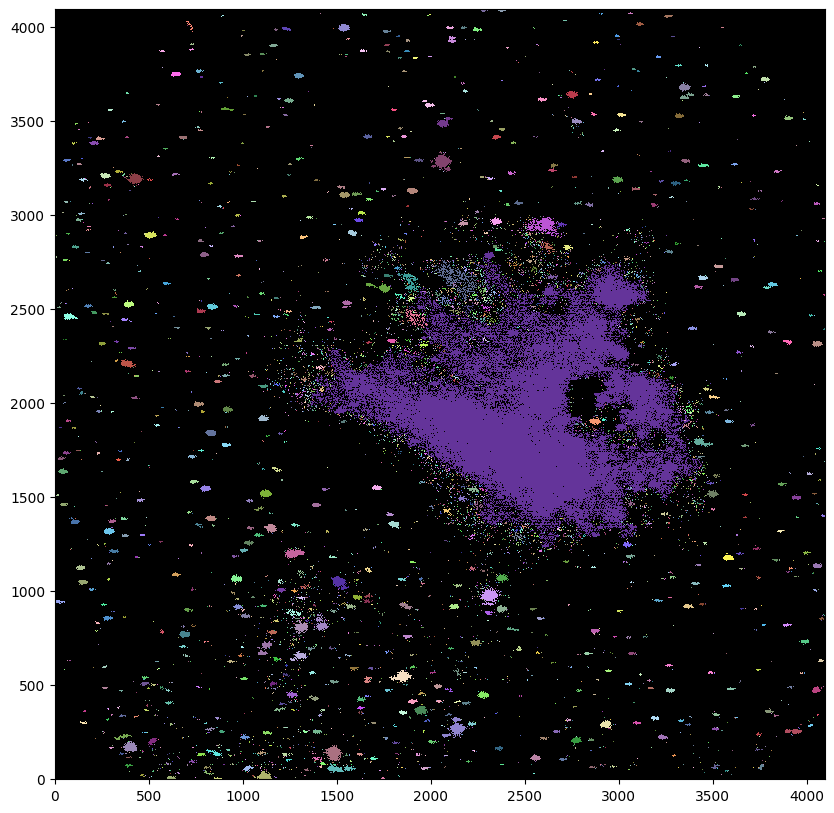

In [25]:
#Generamos un mapa de color para cada fuente del filtro B
cmap_sourB = sourB.make_cmap(seed=123)
#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(sourB, origin='lower', cmap=cmap_sourB, interpolation='nearest')
plt.show()

In [26]:
# separamos las fuentes 
sour_deblendB = deblend_sources(dataB, sourB, npixels=10, nlevels=32, contrast=1)
#esto muestra el numero de fuentes detectadas
sour_deblendB

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 9528
labels: [   1    2    3    4    5 ... 9524 9525 9526 9527 9528]

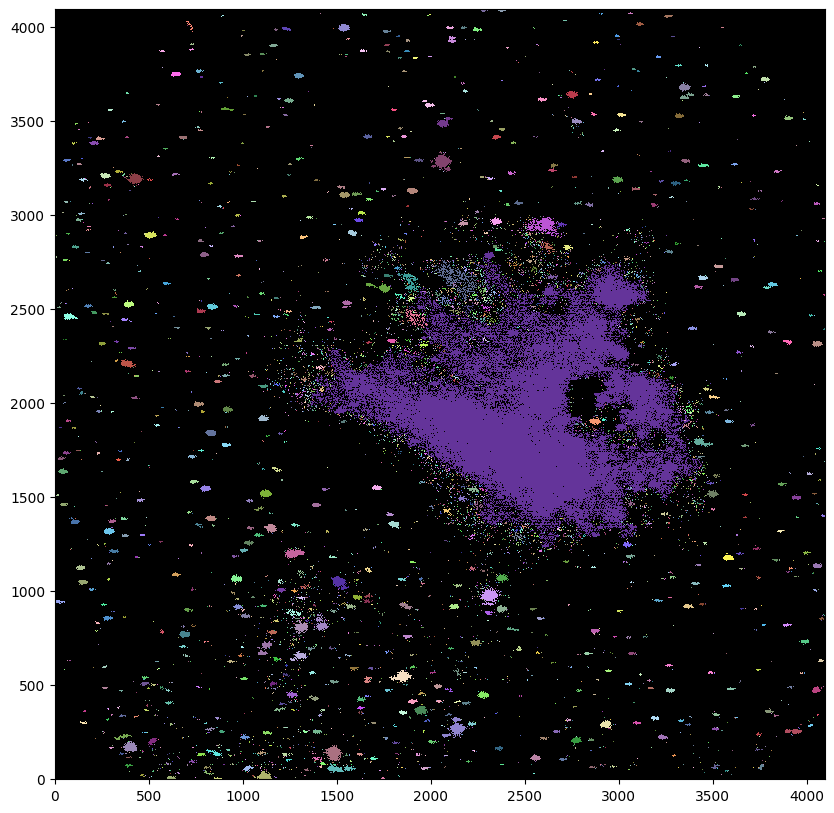

In [27]:
cmap_deblendB = sour_deblendB.make_cmap(seed=123)
#muesta las fuentes detectadas
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(sour_deblendB, origin='lower', cmap= cmap_deblendB, interpolation='nearest')
plt.show()

In [28]:
#OBTENEMOS EL CATALOGO DE FITS REDUCIDO PARA EL FILTRO B
catB = SourceCatalog(dataB, sour_deblendB)
#pasamos el catalogo a una tabla (solo con los datos que nos interesan)
tb1B = catB.to_table()
tablaB = tb1B['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
#label: numero id de la fuente'
#xcentroid, ycentroid: coordenadas'
#area: tamaño en pixeles'
#segment_flux: flujo total (no es el real pq no cuenta el tiempo de exp)'

tablaB


label,xcentroid,ycentroid,area,segment_flux
,,,pix2,
int32,float64,float64,float64,float64
1,428.31909334514546,2.1933797068084417,19.0,393.06616973876953
2,616.9815511143765,5.92772390149682,603.0,21659.553619384766
3,864.6720886742605,2.581800867779408,234.0,6181.294334411621
4,1111.1863440811103,8.554852720255182,2334.0,510803.5832576752
5,1636.056891111873,2.197309739548801,23.0,466.8694877624512
6,1741.2407846110927,2.8766166997617053,145.0,3509.392520904541
7,1960.4709078875526,1.3739191302650122,11.0,233.62675094604492
8,2847.2653194640725,0.9252867430534868,17.0,354.10876655578613


In [29]:
#calculamos el flujo real 
tablaB['segment_flux'] = tablaB['segment_flux']/headerB['EXPTIME']
tablaB

label,xcentroid,ycentroid,area,segment_flux
,,,pix2,
int32,float64,float64,float64,float64
1,428.31909334514546,2.1933797068084417,19.0,13.102205657958985
2,616.9815511143765,5.92772390149682,603.0,721.9851206461589
3,864.6720886742605,2.581800867779408,234.0,206.04314448038738
4,1111.1863440811103,8.554852720255182,2334.0,17026.78610858917
5,1636.056891111873,2.197309739548801,23.0,15.562316258748373
6,1741.2407846110927,2.8766166997617053,145.0,116.97975069681803
7,1960.4709078875526,1.3739191302650122,11.0,7.787558364868164
8,2847.2653194640725,0.9252867430534868,17.0,11.803625551859538


In [30]:
#CALCULAMOS MAG APARENTES CON EL ZEROPONIT (NO LO TENGO LOL)
#puse un valor falso x mientras
zeropoint = 39.022104169660096
tablaB['magnitude'] = zeropoint - 2.5*np.log(tablaB['segment_flux'])
tablaB

label,xcentroid,ycentroid,area,segment_flux,magnitude
,,,pix2,,
int32,float64,float64,float64,float64,float64
1,428.31909334514546,2.1933797068084417,19.0,13.102205657958985,32.59015270248287
2,616.9815511143765,5.92772390149682,603.0,721.9851206461589,22.567092844267243
3,864.6720886742605,2.581800867779408,234.0,206.04314448038738,25.70189020444652
4,1111.1863440811103,8.554852720255182,2334.0,17026.78610858917,14.665746578546859
5,1636.056891111873,2.197309739548801,23.0,15.562316258748373,32.159973250938954
6,1741.2407846110927,2.8766166997617053,145.0,116.97975069681803,27.117102047530395
7,1960.4709078875526,1.3739191302650122,11.0,7.787558364868164,33.89078572273108
8,2847.2653194640725,0.9252867430534868,17.0,11.803625551859538,32.85108733356624


In [31]:
#Mostramos las magnitudes
np.sort(tablaB['magnitude'])

4.353776779997055
12.193886282653175
13.44049079919525
13.588817566320333
14.116083380797804
14.336604239232951
14.665746578546859
15.043820187669173
15.055753931179815
15.714573297759696
15.757448590269593
